### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
from tabulate import tabulate
sns.set_style("whitegrid")
sns.set_palette("pastel")

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../data/traditional_preprocessed_data.csv')
df.head()

,Comment,Sentiment,Language
0,맛있 분위기 좋 어요 ! 야외 에서 식사 가능 어서 날씨 좋 으면 더 좋 어요,1,ko
1,어느 수산 시장 에서 나 나오 면 먹 수 있 민어 . 맛집 서비스 업종 역사 상 최...,0,ko
2,wow wow funki littl fleet sassi,1,en
3,invent origin purpos british thing ever saw today,1,en
4,양 푸짐 소스 모자라 면 리필 가능 어서 좋 어요 . 명 먹 기 좀 많 양 나 먹 ...,1,ko


In [3]:
print(df["Comment"].isnull().sum())
df = df.dropna(subset=["Comment"])
df["Sentiment"].value_counts()

32


Sentiment
1    99989
0    99979
Name: count, dtype: int64

In [4]:
df_copy = df.copy()

## Train test split

In [5]:
def train_test_split_with_vectorized(df, test_size):
    X = df["Comment"]
    y = df["Sentiment"]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )

    tfidf = TfidfVectorizer()
    X_train_vec = tfidf.fit_transform(X_train)
    X_test_vec = tfidf.transform(X_test)

    return X_train_vec, X_test_vec, y_train, y_test, tfidf

## Training and Evaluation

In [6]:
def train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name):
    print(f"{'-' * 40}{model_name}{'-' * 40}")
    model.fit(X_train, y_train)

    results = []

    for mode, X, y in [("Test", X_test, y_test), ("Train", X_train, y_train)]:
        y_pred = model.predict(X)
        print(f"\n{mode} Classification Report:\n")
        print(classification_report(y, y_pred))

        ConfusionMatrixDisplay.from_estimator(model, X, y, display_labels=["Negative", "Positive"], cmap="Blues")
        plt.title(f"{model_name} Confusion Matrix ({mode} Set)")
        plt.show()

        report = classification_report(y, y_pred, output_dict=True, zero_division=0)
        acc = accuracy_score(y, y_pred)
        results.append(
            {
                "Model": model_name,
                "Dataset": mode,
                "Accuracy": acc,
                "Precision": report["weighted avg"]["precision"],
                "Recall": report["weighted avg"]["recall"],
                "F1-Score": report["weighted avg"]["f1-score"],
            }
        )

    return results

## Model Training

In [7]:
def run_all_models(X_train, X_test, y_train, y_test):
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "SVM": LinearSVC(),
        "Naive Bayes": MultinomialNB(),
    }
    
    all_results = []
    for name, model in models.items():
        results = train_and_evaluate(model, X_train, X_test, y_train, y_test, name)
        all_results.extend(results)
        
    return all_results
        

In [8]:
def train_models(df, language):
    print(f"\n\n{'-' * 40}{language}{'-' * 40}")
    X_train, X_test, y_train, y_test, _ = train_test_split_with_vectorized(df, 0.2)
    results = run_all_models(X_train, X_test, y_train, y_test)
    for r in results:
        r["Language"] = language
    return pd.DataFrame(results)

### English + Korean



----------------------------------------English + Korean----------------------------------------
----------------------------------------Logistic Regression----------------------------------------

Test Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.89      0.87     20128
           1       0.88      0.84      0.86     19866

    accuracy                           0.87     39994
   macro avg       0.87      0.87      0.87     39994
weighted avg       0.87      0.87      0.87     39994



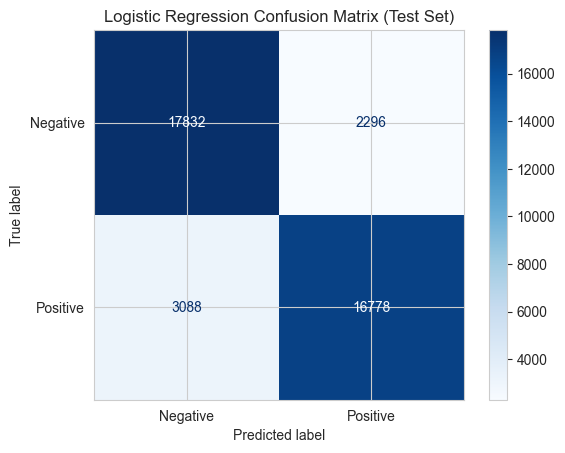


Train Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     79851
           1       0.91      0.87      0.89     80123

    accuracy                           0.89    159974
   macro avg       0.89      0.89      0.89    159974
weighted avg       0.89      0.89      0.89    159974



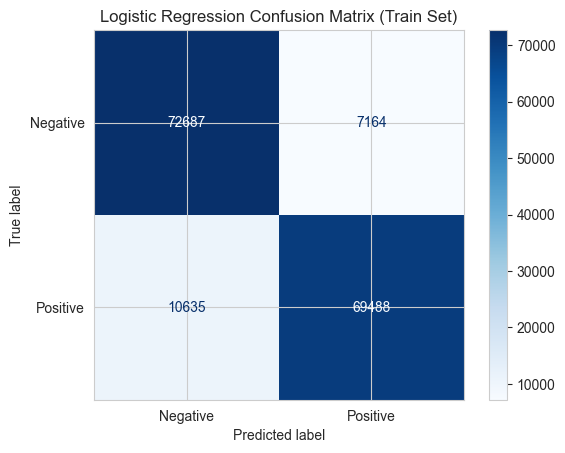

----------------------------------------SVM----------------------------------------

Test Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.88      0.87     20128
           1       0.87      0.85      0.86     19866

    accuracy                           0.86     39994
   macro avg       0.86      0.86      0.86     39994
weighted avg       0.86      0.86      0.86     39994



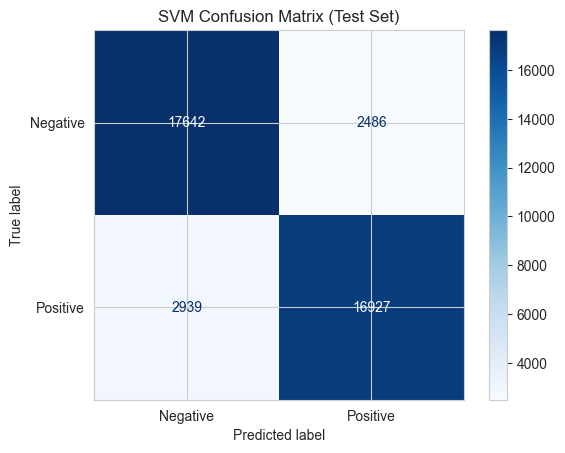


Train Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.93      0.93     79851
           1       0.93      0.92      0.93     80123

    accuracy                           0.93    159974
   macro avg       0.93      0.93      0.93    159974
weighted avg       0.93      0.93      0.93    159974



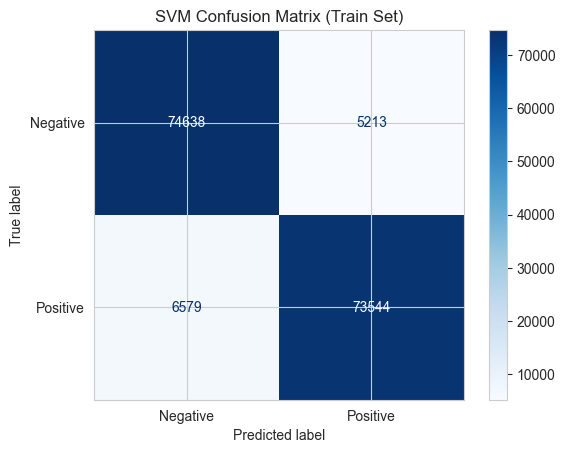

----------------------------------------Naive Bayes----------------------------------------

Test Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.86      0.85     20128
           1       0.86      0.84      0.85     19866

    accuracy                           0.85     39994
   macro avg       0.85      0.85      0.85     39994
weighted avg       0.85      0.85      0.85     39994



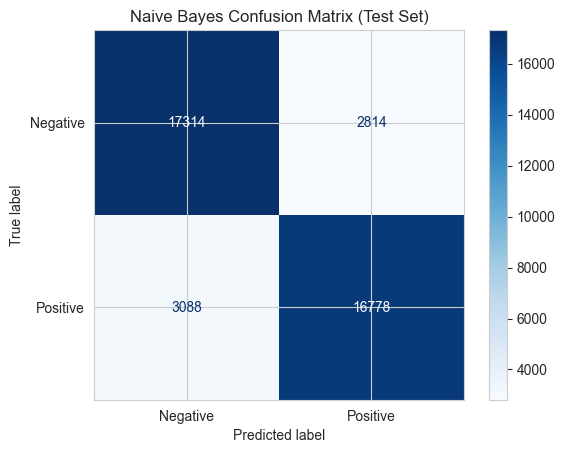


Train Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.88      0.88     79851
           1       0.88      0.87      0.87     80123

    accuracy                           0.88    159974
   macro avg       0.88      0.88      0.88    159974
weighted avg       0.88      0.88      0.88    159974



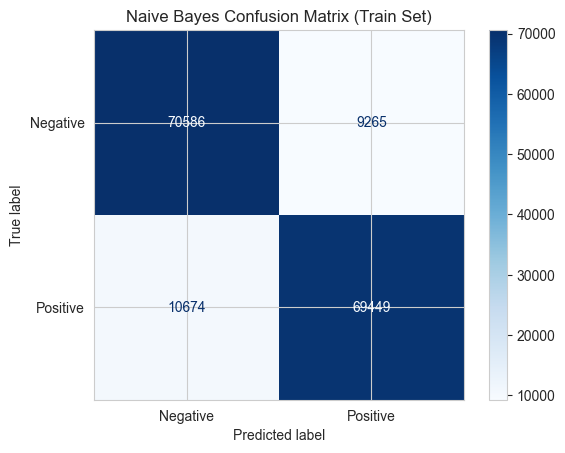

In [9]:
results_en_ko = train_models(df, "English + Korean")

### Korean Only



----------------------------------------Korean----------------------------------------
----------------------------------------Logistic Regression----------------------------------------

Test Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     10108
           1       0.92      0.92      0.92      9892

    accuracy                           0.92     20000
   macro avg       0.92      0.92      0.92     20000
weighted avg       0.92      0.92      0.92     20000



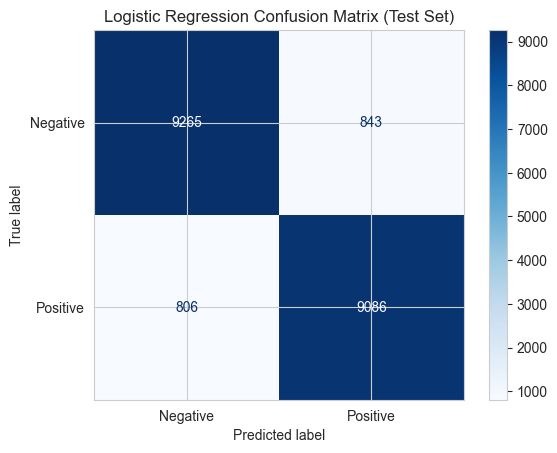


Train Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     39892
           1       0.93      0.93      0.93     40108

    accuracy                           0.93     80000
   macro avg       0.93      0.93      0.93     80000
weighted avg       0.93      0.93      0.93     80000



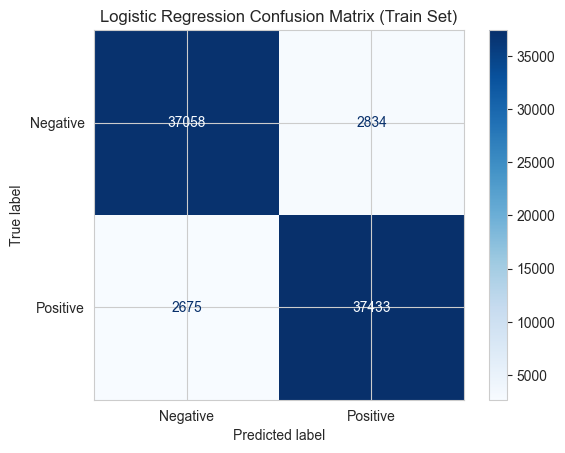

----------------------------------------SVM----------------------------------------

Test Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     10108
           1       0.91      0.92      0.92      9892

    accuracy                           0.92     20000
   macro avg       0.92      0.92      0.92     20000
weighted avg       0.92      0.92      0.92     20000



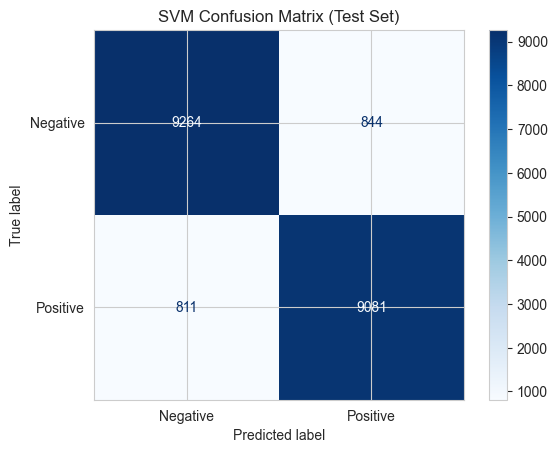


Train Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.95      0.96     39892
           1       0.95      0.96      0.96     40108

    accuracy                           0.96     80000
   macro avg       0.96      0.96      0.96     80000
weighted avg       0.96      0.96      0.96     80000



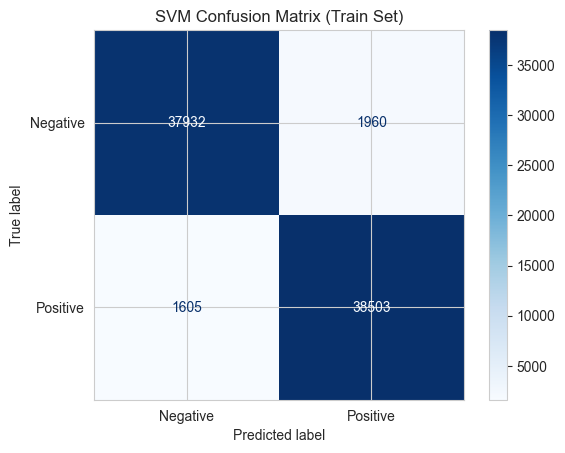

----------------------------------------Naive Bayes----------------------------------------

Test Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.87      0.90     10108
           1       0.87      0.94      0.90      9892

    accuracy                           0.90     20000
   macro avg       0.90      0.90      0.90     20000
weighted avg       0.90      0.90      0.90     20000



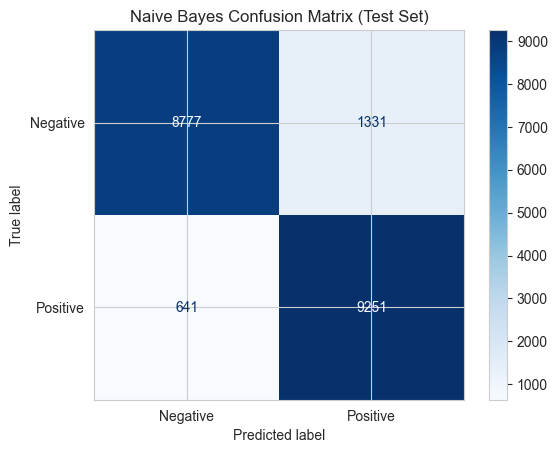


Train Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.88      0.91     39892
           1       0.89      0.94      0.92     40108

    accuracy                           0.91     80000
   macro avg       0.91      0.91      0.91     80000
weighted avg       0.91      0.91      0.91     80000



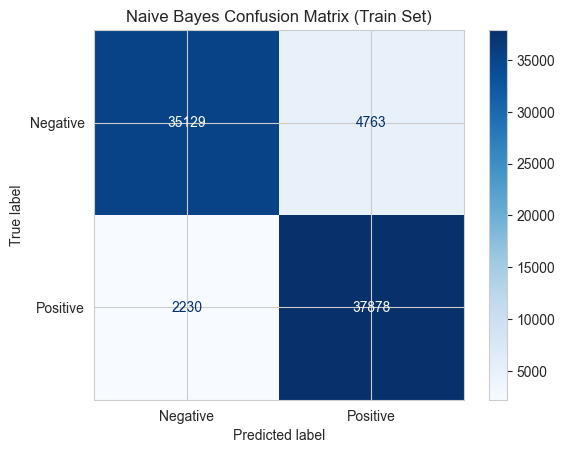

In [10]:
df_ko = df_copy[df_copy["Language"] == "ko"]
results_ko = train_models(df_ko, "Korean")

### English Only



----------------------------------------English----------------------------------------
----------------------------------------Logistic Regression----------------------------------------

Test Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.86      0.82     10012
           1       0.85      0.77      0.80      9982

    accuracy                           0.81     19994
   macro avg       0.82      0.81      0.81     19994
weighted avg       0.82      0.81      0.81     19994



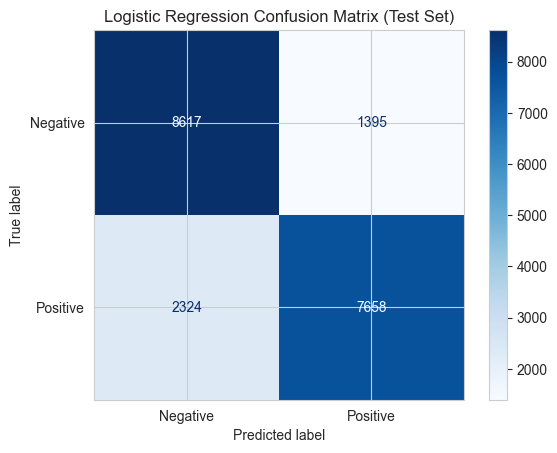


Train Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.90      0.86     39967
           1       0.88      0.81      0.84     40007

    accuracy                           0.85     79974
   macro avg       0.85      0.85      0.85     79974
weighted avg       0.85      0.85      0.85     79974



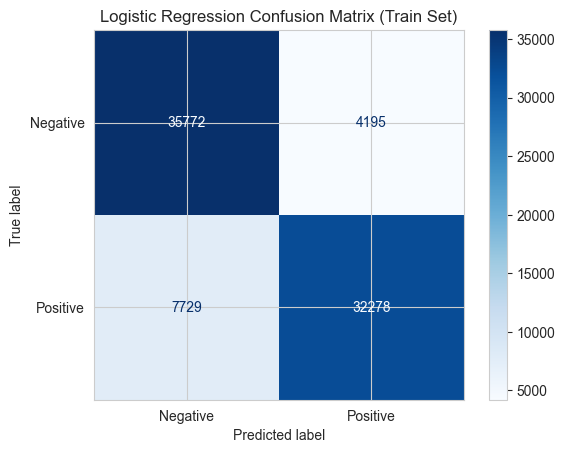

----------------------------------------SVM----------------------------------------

Test Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.83      0.81     10012
           1       0.82      0.79      0.81      9982

    accuracy                           0.81     19994
   macro avg       0.81      0.81      0.81     19994
weighted avg       0.81      0.81      0.81     19994



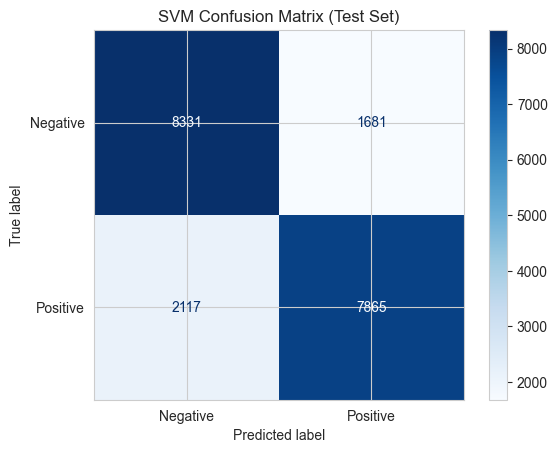


Train Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     39967
           1       0.92      0.88      0.90     40007

    accuracy                           0.90     79974
   macro avg       0.90      0.90      0.90     79974
weighted avg       0.90      0.90      0.90     79974



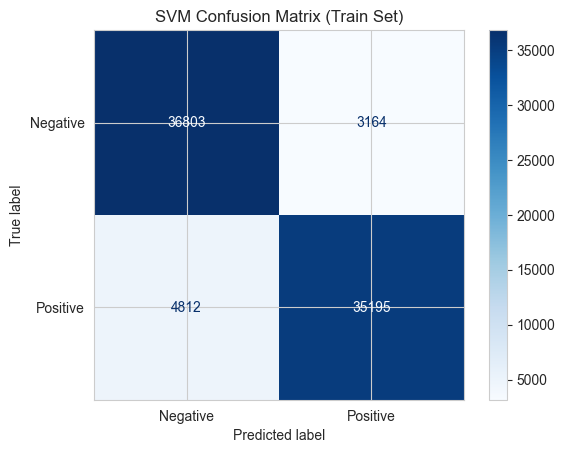

----------------------------------------Naive Bayes----------------------------------------

Test Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.85      0.81     10012
           1       0.84      0.76      0.80      9982

    accuracy                           0.81     19994
   macro avg       0.81      0.81      0.81     19994
weighted avg       0.81      0.81      0.81     19994



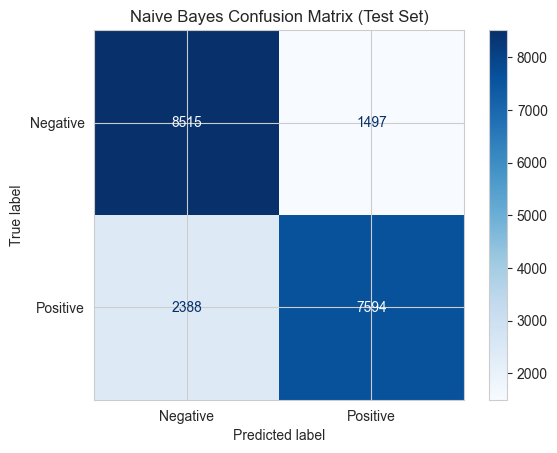


Train Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.88      0.85     39967
           1       0.87      0.81      0.84     40007

    accuracy                           0.85     79974
   macro avg       0.85      0.85      0.85     79974
weighted avg       0.85      0.85      0.85     79974



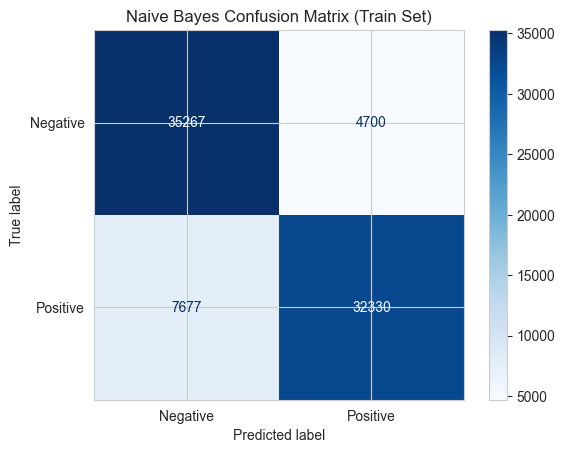

In [11]:
df_en = df_copy[df_copy["Language"] == "en"]
results_en = train_models(df_en, "English")

## Comparing

In [12]:
import pandas as pd

pd.set_option("display.width", 200) 
pd.set_option("display.max_columns", 20) 
pd.set_option("display.max_colwidth", None) 

all_results_df = pd.concat([results_en_ko, results_en, results_ko], ignore_index=True)

print("FINAL COMPARISON SUMMARY")

print(tabulate(all_results_df.reset_index(drop=True), headers="keys", tablefmt="psql"))

FINAL COMPARISON SUMMARY
+----+---------------------+-----------+------------+-------------+----------+------------+------------------+
|    | Model               | Dataset   |   Accuracy |   Precision |   Recall |   F1-Score | Language         |
|----+---------------------+-----------+------------+-------------+----------+------------+------------------|
|  0 | Logistic Regression | Test      |   0.86538  |    0.865919 | 0.86538  |   0.86531  | English + Korean |
|  1 | Logistic Regression | Train     |   0.888738 |    0.88948  | 0.888738 |   0.88869  | English + Korean |
|  2 | SVM                 | Test      |   0.864355 |    0.864522 | 0.864355 |   0.864327 | English + Korean |
|  3 | SVM                 | Train     |   0.926288 |    0.926415 | 0.926288 |   0.926284 | English + Korean |
|  4 | Naive Bayes         | Test      |   0.852428 |    0.852481 | 0.852428 |   0.852414 | English + Korean |
|  5 | Naive Bayes         | Train     |   0.875361 |    0.875481 | 0.875361 |   0.8753

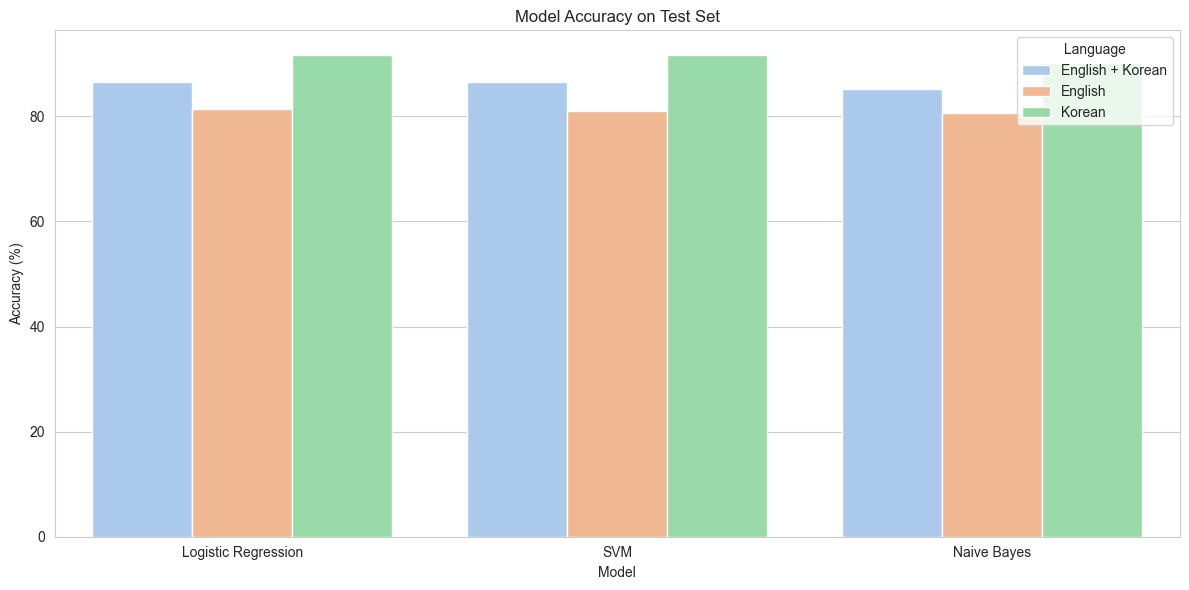

In [13]:
plt.figure(figsize=(12, 6))
subset = all_results_df[all_results_df["Dataset"] == "Test"].copy()
subset["Accuracy_percent"] = subset["Accuracy"] * 100

sns.barplot(
    data=subset,
    x="Model",
    y="Accuracy_percent", 
    hue="Language",
)

plt.title(f"Model Accuracy on Test Set")
plt.ylabel("Accuracy (%)")
plt.legend(title="Language")
plt.xticks()
plt.tight_layout()
plt.show()